In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

                       
                        
                          


In [36]:
pwd

'/Users/kieranlockyer'

In [37]:
cd

/Users/kieranlockyer


In [38]:
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

In [39]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
177/891

0.19865319865319866

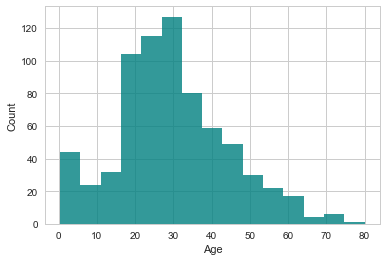

In [9]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()


In [10]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


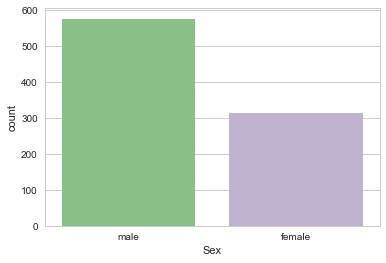

In [11]:
sns.countplot(x='Sex', data=titanic_df, palette="Accent")

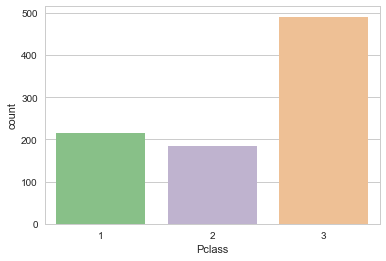

In [12]:
sns.countplot(x='Pclass', data=titanic_df, palette="Accent")

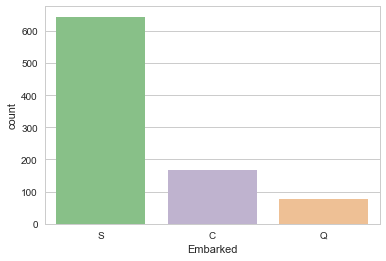

In [13]:
sns.countplot(x='Embarked', data=titanic_df, palette="Accent")

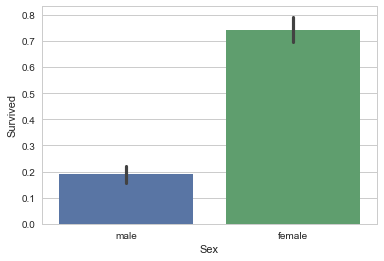

In [14]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)



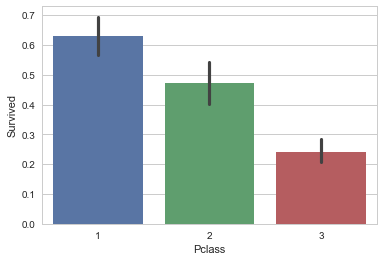

In [15]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

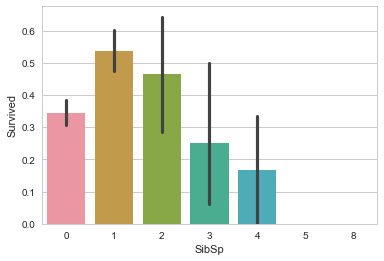

In [16]:
sns.barplot(x='SibSp', y='Survived', data=titanic_df)

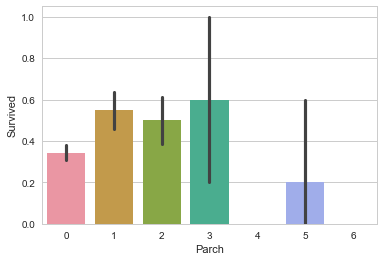

In [17]:
sns.barplot(x='Parch', y='Survived', data=titanic_df)

In [18]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

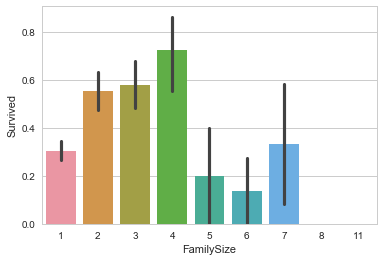

In [19]:
sns.barplot(x='FamilySize', y='Survived', data=titanic_df)

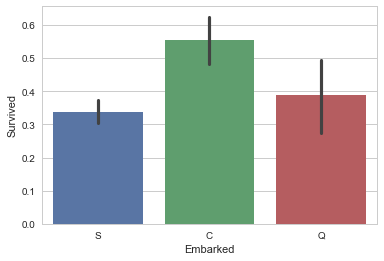

In [20]:
sns.barplot(x='Embarked', y='Survived', data=titanic_df)

In [21]:
titanic_df['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [22]:
titanic_df['Name_Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0])
titanic_df['Name_Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Mme               1
 Sir               1
 Capt              1
 Lady              1
 Ms                1
 Jonkheer          1
 the Countess      1
 Don               1
Name: Name_Title, dtype: int64

In [23]:
print (titanic_df[['Name_Title', 'Survived']].groupby(['Name_Title'], as_index=True).mean())

               Survived
Name_Title             
 Capt          0.000000
 Col           0.500000
 Don           0.000000
 Dr            0.428571
 Jonkheer      0.000000
 Lady          1.000000
 Major         0.500000
 Master        0.575000
 Miss          0.697802
 Mlle          1.000000
 Mme           1.000000
 Mr            0.156673
 Mrs           0.792000
 Ms            1.000000
 Rev           0.000000
 Sir           1.000000
 the Countess  1.000000


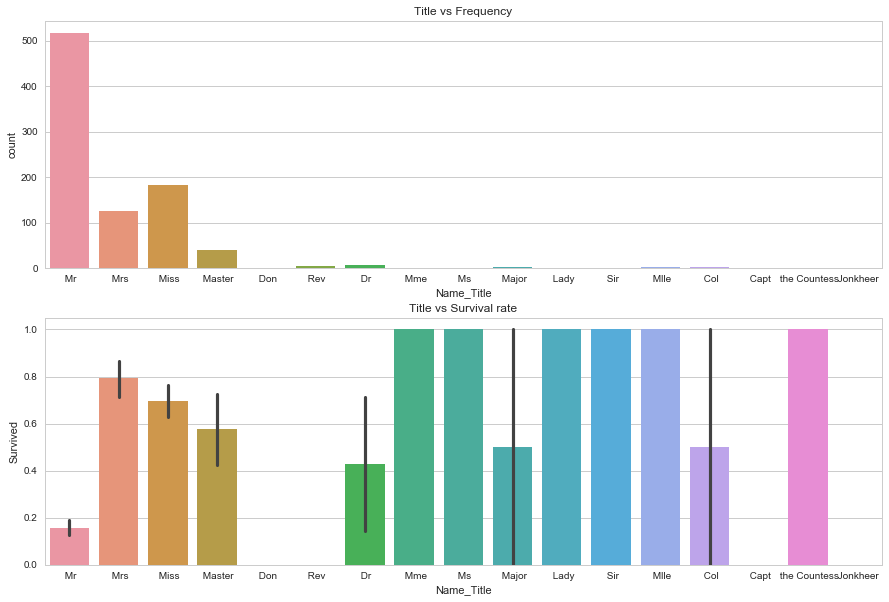

In [24]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vs Survival rate")
fig1_title = sns.countplot(data=titanic_df, x='Name_Title', ax=axes[0])
fig2_title = sns.barplot(data=titanic_df, x='Name_Title',y='Survived', ax=axes[1])

In [25]:
titanic_df.groupby(['Name_Title','Sex']).Age.value_counts()

Name_Title     Sex     Age  
 Capt          male    70.00     1
 Col           male    56.00     1
                       60.00     1
 Don           male    40.00     1
 Dr            female  49.00     1
               male    23.00     1
                       32.00     1
                       44.00     1
                       50.00     1
                       54.00     1
 Jonkheer      male    38.00     1
 Lady          female  48.00     1
 Major         male    45.00     1
                       52.00     1
 Master        male    1.00      5
                       4.00      5
                       2.00      4
                       3.00      4
                       9.00      4
                       0.83      2
                       7.00      2
                       8.00      2
                       11.00     2
                       0.42      1
                       0.67      1
                       0.92      1
                       6.00      1
                       10.

In [26]:
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Mlle','Miss')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Ms','Miss')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Mme', 'Mrs')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Lady', 'Royalty')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('the Countess', 'Royalty')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Don', 'Royalty')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Sir', 'Royalty')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Jonkheer', 'Royalty')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Dona', 'Royalty')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Capt', 'Army')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Col', 'Army')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Major', 'Army')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Dr', 'Misc')
titanic_df['Name_Title'] = titanic_df['Name_Title'].str.replace('Rev', 'Misc')

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


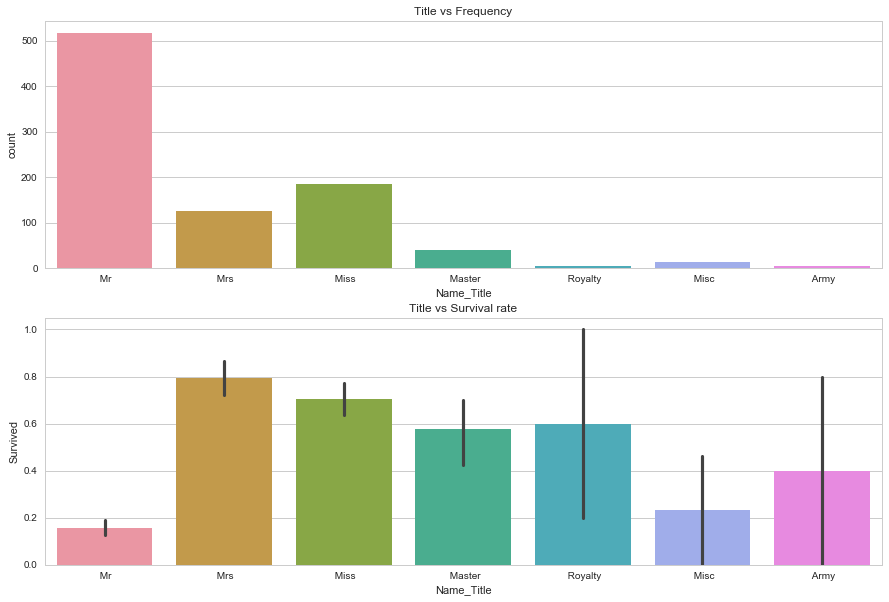

In [28]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vs Survival rate")
fig1_title = sns.countplot(data=titanic_df, x='Name_Title', ax=axes[0])
fig2_title = sns.barplot(data=titanic_df, x='Name_Title',y='Survived', ax=axes[1])

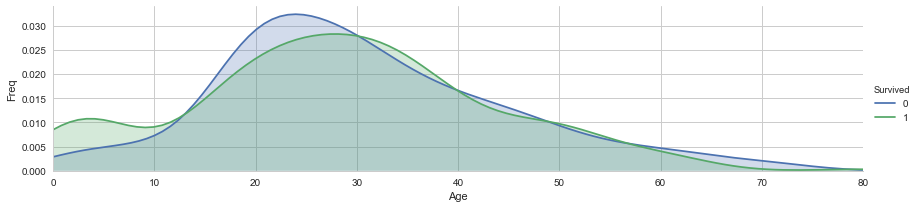

In [29]:
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

In [50]:
"interpolation of graph intersection shows 13 years being the point of cut off for child in terms of survival"

'interpolation of graph intersection shows 13 years being the point of cut off for child in terms of survival'

In [30]:
titanic_df.groupby(['Sex','Pclass', 'Name_Title'],sort=True)['Age'].mean()

Sex     Pclass  Name_Title
female  1        Misc         49.000000
                 Miss         29.744681
                 Mrs          40.400000
                 Royalty      40.500000
        2        Miss         22.560606
                 Mrs          33.682927
        3        Miss         16.123188
                 Mrs          33.515152
male    1        Army         56.600000
                 Master        5.306667
                 Misc         42.000000
                 Mr           41.580460
                 Royalty      42.333333
        2        Master        2.258889
                 Misc         42.000000
                 Mr           32.768293
        3        Master        5.350833
                 Mr           28.724891
Name: Age, dtype: float64

In [66]:
 titanic_df['Survived'].groupby(pd.qcut(titanic_df['Age'],24)).mean()

Age
(0.419, 3.708]    0.666667
(3.708, 9.0]      0.562500
(9.0, 16.0]       0.447368
(16.0, 18.0]      0.384615
(18.0, 19.0]      0.360000
(19.0, 20.125]    0.200000
(20.125, 22.0]    0.307692
(22.0, 23.0]      0.333333
(23.0, 24.0]      0.483871
(24.0, 25.0]      0.250000
(25.0, 27.0]      0.472222
(27.0, 28.0]      0.280000
(28.0, 30.0]      0.382979
(30.0, 31.0]      0.421053
(31.0, 32.312]    0.500000
(32.312, 34.0]    0.406250
(34.0, 36.0]      0.536585
(36.0, 38.0]      0.333333
(38.0, 40.5]      0.379310
(40.5, 44.0]      0.363636
(44.0, 47.0]      0.230769
(47.0, 51.0]      0.531250
(51.0, 58.0]      0.448276
(58.0, 80.0]      0.250000
Name: Survived, dtype: float64

In [34]:
facet = sns.FacetGrid(titanic_df, hue="Gender",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

KeyError: 'Gender'

In [ ]:

age_labels  = ['0-7', '7-14', '14-21', '21-28', '28-35', '35-42', '42-49', '49-56', '56-63', '63-70', '70-77', '77-84']
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 85, 7), right=False, labels=age_labels)




In [ ]:
titanic_df.groupby(['age_group']).Survived.mean()

In [ ]:
titanic_df.groupby(['Sex','age_group']).Survived.mean()

In [ ]:
titanic_df.groupby(['Sex','age_group']).Survived.value_counts()

In [ ]:
titanic_df.groupby(['Sex','age_group']).Survived.mean()

In [ ]:
titanic_df.groupby(['Name_Title','age_group']).Survived.mean()

In [ ]:
titanic_df.groupby(['Name_Title','age_group']).Survived.value_counts()

In [ ]:
titanic_df.groupby(['Name_Title','age_group']).Survived.mean()

In [ ]:
titanic_df.groupby(['age_group','Fare']).Pclass.value_counts()

In [ ]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }

In [ ]:
titanic_df['Survived'].groupby(titanic_df['SibSp']).mean()

In [ ]:
titanic_df['SibSp'].value_counts()

In [ ]:
titanic_df['Survived'].groupby(titanic_df['Parch']).mean()

In [ ]:
titanic_df['Parch'].value_counts()

In [ ]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1


In [ ]:
titanic_df['Survived'].groupby(titanic_df['FamilySize']).mean()

In [ ]:
titanic_df['TicketPrice'] = titanic_df['Fare'] / titanic_df['FamilySize']

In [ ]:
titanic_df.head(10)

In [ ]:
titanic_df.groupby(['Pclass','Embarked']).TicketPrice.mean()

In [ ]:
titanic_df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin'] , axis=1)

In [ ]:
sns.heatmap(titanic_df.corr(),annot=True)
plt.show()